In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
from pathlib import Path
from dotenv import load_dotenv
import os
load_dotenv()

df = pd.read_csv(os.getenv('csv_path'), encoding='cp932')
df.columns.tolist()
columns = {
    '計算対象': 'to_calc',
    '日付': 'date',
    '内容': 'item',
    '金額（円）': 'amount',
    '保有金融機関': 'bank',
    '大項目': 'cat1',
    '中項目': 'cat2',
    'メモ': 'detail',
    '振替': 'transfer',
    'ID': 'id'
}
df.rename(columns=columns, inplace=True)
df = df.loc[
    (df.to_calc==1) &
    (df.transfer==0) &
    (df.cat1!='収入')
]
df.amount = df.amount.abs()

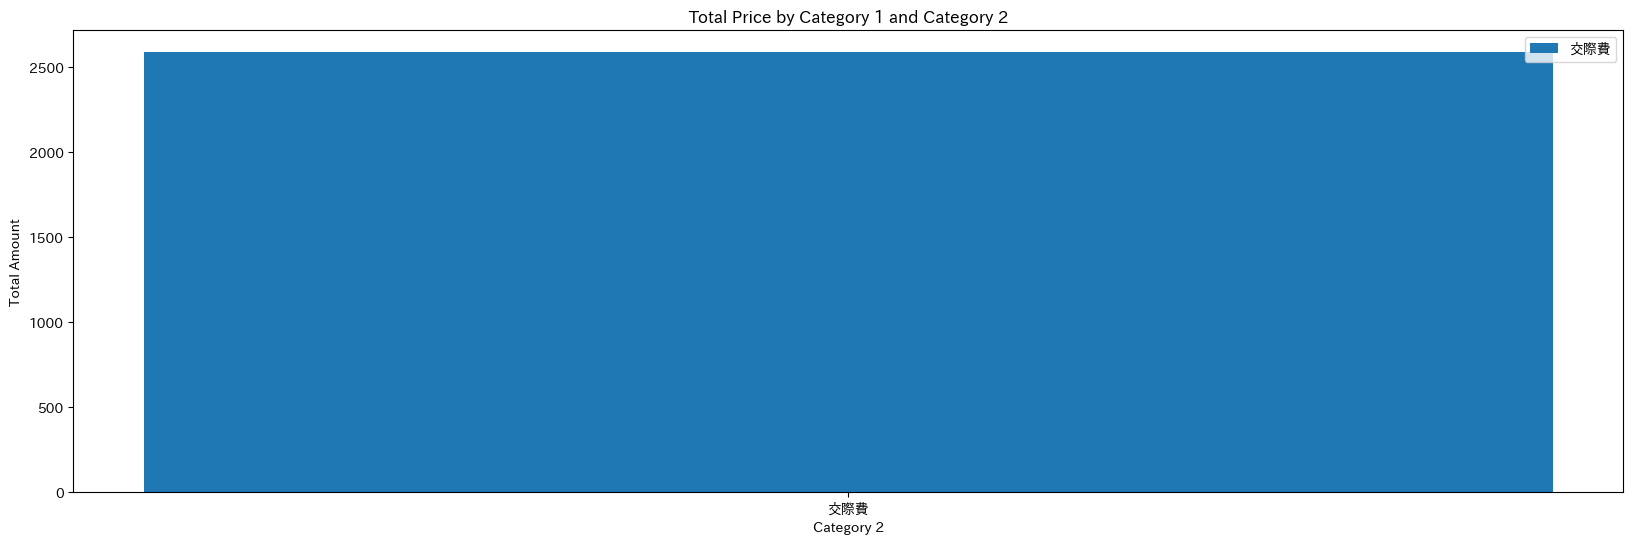

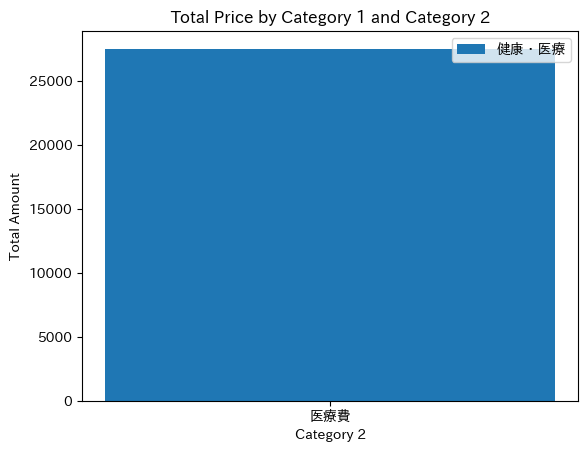

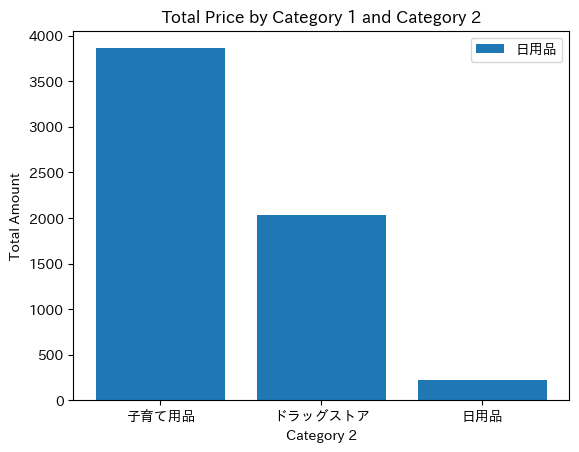

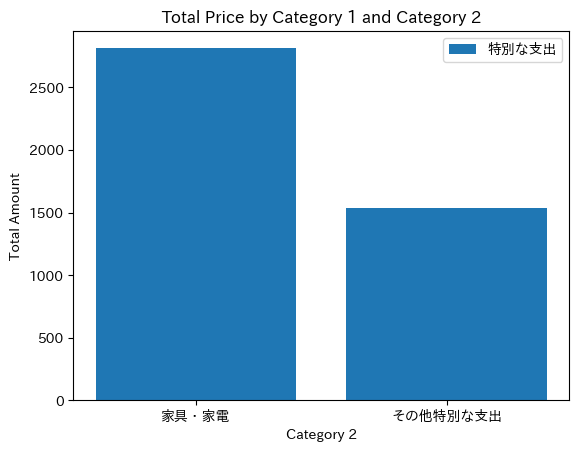

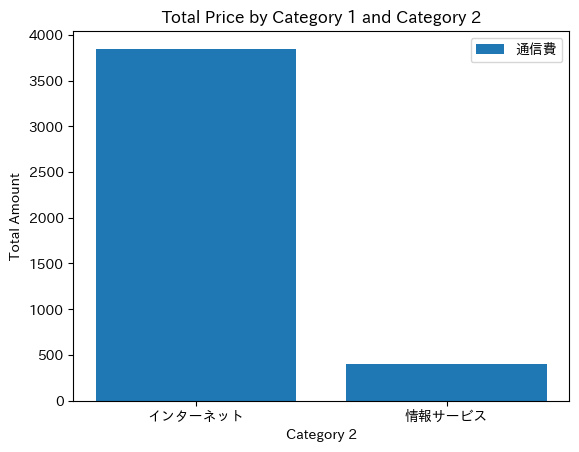

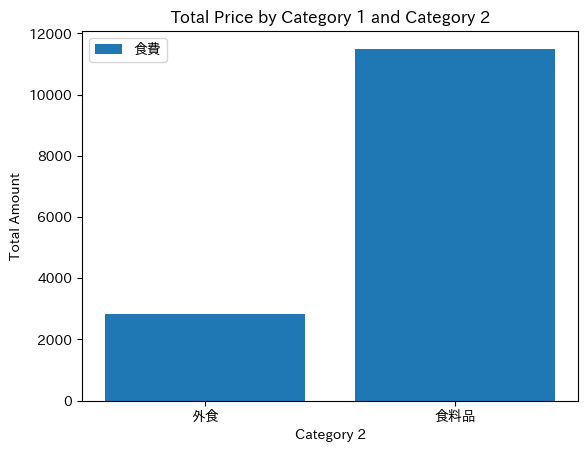

In [25]:
plt.figure(figsize=(20, 6))

# グループごとに合計価格を棒グラフで描画
for name, group in df.groupby(["cat1"]):
    if len(group['cat2']) == 1:
        continue
    plt.bar(group["cat2"], group["amount"], label=name)
    plt.xlabel("Category 2")
    plt.ylabel("Total Amount")
    plt.title("Total Price by Category 1 and Category 2")
    plt.legend()
    plt.show()